In [1]:
using Pkg,Plots
Pkg.activate("..")
using Clapeyron

  Activating environment at `C:\Users\Pierre J Walker\OneDrive - Imperial College London\Documents\OpenSAFT\Project.toml`
┌ Info: Precompiling Clapeyron [7c7805af-46cc-48c9-995b-ed0ed2dc909a]
└ @ Base loading.jl:1342


In this notebook we will try to replicate various figures from V. Papaioannou _et al._ 's 2016 paper

## Figure 2

In [2]:
# Setting up the models
ethane       = SAFTgammaMie(["ethane"])
propane      = SAFTgammaMie(["propane"])
butane       = SAFTgammaMie(["butane"])
pentane      = SAFTgammaMie(["pentane"])
hexane       = SAFTgammaMie(["hexane"])
heptane      = SAFTgammaMie(["heptane"])
octane       = SAFTgammaMie(["octane"])
nonane       = SAFTgammaMie(["nonane"])
decane       = SAFTgammaMie(["decane"]);

In [3]:
# Get critical point for all species
(T_c_ethane, p_c_ethane, v_c_ethane)                   = crit_pure(ethane)
(T_c_propane, p_c_propane, v_c_propane)                = crit_pure(propane)
(T_c_butane, p_c_butane, v_c_butane)                   = crit_pure(butane)
(T_c_pentane, p_c_pentane, v_c_pentane)                = crit_pure(pentane)
(T_c_hexane, p_c_hexane, v_c_hexane)                   = crit_pure(hexane)
(T_c_heptane, p_c_heptane, v_c_heptane)                = crit_pure(heptane)
(T_c_octane, p_c_octane, v_c_octane)                   = crit_pure(octane)
(T_c_nonane, p_c_nonane, v_c_nonane)                   = crit_pure(nonane)
(T_c_decane, p_c_decane, v_c_decane)                   = crit_pure(decane);

In [42]:
0.7*T_c_heptane

385.47915265786054

In [45]:
Clapeyron.sat_pure(octane,400)

(670989.8391868001, 0.0023955271002744625, 0.002409744271836044)

In [50]:
# Get saturation properties for all species
T_ethane       = range(0.7*T_c_ethane, T_c_ethane, length = 100)
T_propane      = range(0.7*T_c_propane, T_c_propane, length = 100)
T_butane       = range(0.7*T_c_butane, T_c_butane, length = 100)
T_pentane      = range(0.7*T_c_pentane, T_c_pentane, length = 100)
T_hexane       = range(0.7*T_c_hexane, T_c_hexane, length = 100)
T_heptane      = range(0.7*T_c_heptane, T_c_heptane, length = 100)
T_octane       = range(0.7*T_c_octane, T_c_octane, length = 100)
T_nonane       = range(0.7*T_c_nonane, T_c_nonane, length = 100)
T_decane       = range(0.7*T_c_decane, T_c_decane, length = 100)

B = sat_pure.(ethane,T_ethane)
C = sat_pure.(propane,T_propane)
D = sat_pure.(butane,T_butane)
E = sat_pure.(pentane,T_pentane)
F = sat_pure.(hexane,T_hexane)
# G = sat_pure.(heptane,T_heptane)
# H = sat_pure.(octane,T_octane)
# I = sat_pure.(nonane,T_nonane)
# J = sat_pure.(decane,T_decane)

sat_ethane = [tup[i] for tup in B, i in 1:3]
sat_propane = [tup[i] for tup in C, i in 1:3]
sat_butane = [tup[i] for tup in D, i in 1:3]
sat_pentane = [tup[i] for tup in E, i in 1:3]
sat_hexane = [tup[i] for tup in F, i in 1:3]

100×3 Matrix{Float64}:
      8.80575e5    0.00163102     0.0016437
      8.92889e5    0.00161358     0.001626
      9.05343e5    0.00159634     0.0016085
    NaN          NaN            NaN
    NaN          NaN            NaN
    NaN          NaN            NaN
    NaN          NaN            NaN
      9.69779e5    0.00151298     0.0015239
 257538.0          0.000148598    0.0112201
      9.96597e5    0.0014809      0.00149136
      2.7862e5     0.00014951     0.0104081
      1.02402e6    0.00144751     0.00146154
 300982.0          0.000150443    0.00966636
      ⋮                         
      2.67703e6    0.000232852    0.000816469
      2.73826e6    0.00023645     0.000783332
      2.80071e6    0.000240396    0.000750371
      2.8644e6     0.000244766    0.000717468
      2.92937e6    0.000249661    0.000684469
      2.99568e6    0.000255228    0.000651172
    NaN          NaN            NaN
      3.1325e6     0.000269374    0.000582409
      3.20313e6    0.0002789      0.00054581

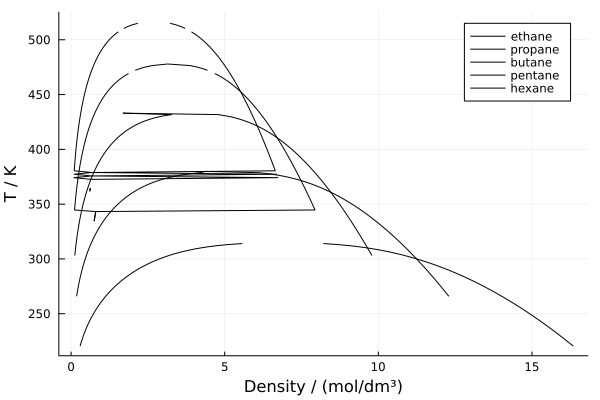

In [51]:
plt = plot( 1e-3 ./sat_ethane[:,2],  T_ethane,color=:black,xlabel="Density / (mol/dm³)",ylabel="T / K", label = "ethane")
plt = plot!(1e-3 ./sat_ethane[:,3],  T_ethane,color=:black, label = "")
plt = plot!(1e-3 ./sat_propane[:,2], T_propane,color=:black, label = "propane")
plt = plot!(1e-3 ./sat_propane[:,3], T_propane,color=:black, label = "")
plt = plot!(1e-3 ./sat_butane[:,2],  T_butane,color=:black, label = "butane")
plt = plot!(1e-3 ./sat_butane[:,3],  T_butane,color=:black, label = "")
plt = plot!(1e-3 ./sat_pentane[:,2], T_pentane,color=:black, label = "pentane")
plt = plot!(1e-3 ./sat_pentane[:,3], T_pentane,color=:black, label = "")
plt = plot!(1e-3 ./sat_hexane[:,2],  T_hexane,color=:black, label = "hexane")
plt = plot!(1e-3 ./sat_hexane[:,3],  T_hexane,color=:black, label = "")
# plt = plot!(1e-3 ./v_l_heptane, T_heptane,color=:black, label = "heptane")
# plt = plot!(1e-3 ./v_v_heptane, T_heptane,color=:black, label = "")
# plt = plot!(1e-3 ./v_l_octane,  T_octane,color=:black, label = "octane")
# plt = plot!(1e-3 ./v_v_octane,  T_octane,color=:black, label = "")
# plt = plot!(1e-3 ./v_l_nonane,  T_nonane,color=:black, label = "nonane")
# plt = plot!(1e-3 ./v_v_nonane,  T_nonane,color=:black, label = "")
# plt = plot!(1e-3 ./v_l_decane,  T_decane,color=:black, label = "decane")
# plt = plot!(1e-3 ./v_v_decane,  T_decane,color=:black, label = "")
display(plt)

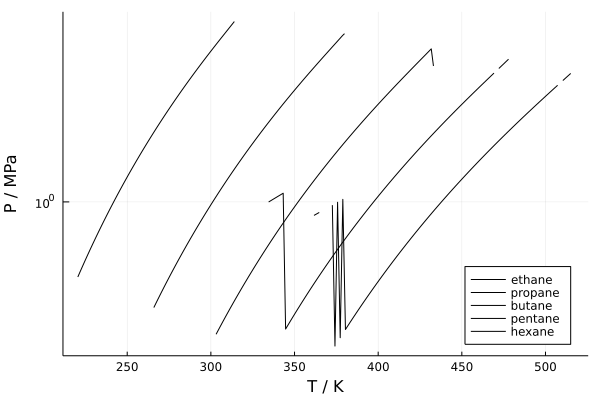

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Pierre J Walker\.julia\packages\PlotUtils\n4I4Q\src\ticks.jl:295
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Pierre J Walker\.julia\packages\PlotUtils\n4I4Q\src\ticks.jl:295


In [52]:
plt = plot(T_ethane,sat_ethane[:,1]/1e6,color=:black,yaxis=:log,xlabel="T / K",ylabel="P / MPa", label = "ethane",legend=:bottomright)
plt = plot!(T_propane,sat_propane[:,1]/1e6,color=:black, label = "propane")
plt = plot!(T_butane,sat_butane[:,1]/1e6,color=:black, label = "butane")
plt = plot!(T_pentane,sat_pentane[:,1]/1e6,color=:black, label = "pentane")
plt = plot!(T_hexane,sat_hexane[:,1]/1e6,color=:black, label = "hexane")
# plt = plot!(T_heptane,sat_heptane[:,1]/1e6,color=:black, label = "heptane")
# plt = plot!(T_octane,sat_octane[:,1]/1e6,color=:black, label = "octane")
# plt = plot!(T_nonane,sat_nonane[:,1]/1e6,color=:black, label = "nonane")
# plt = plot!(T_decane,sat_decane[:,1]/1e6,color=:black, label = "decane")
display(plt)

## Figure 4

In [53]:
# Setting up the models
EthAce       = SAFTgammaMie(["ethyl acetate"])
PropAce      = SAFTgammaMie(["propyl acetate"])
ButAce       = SAFTgammaMie(["butyl acetate"])
PentAce      = SAFTgammaMie(["pentyl acetate"])
HexAce       = SAFTgammaMie(["hexyl acetate"])
HeptAce      = SAFTgammaMie(["heptyl acetate"]);

In [54]:
# Get critical point for all species
(T_c_EthAce, p_c_EthAce, v_c_EthAce)                   = crit_pure(EthAce)
(T_c_PropAce, p_c_PropAce, v_c_PropAce)                = crit_pure(PropAce)
(T_c_ButAce, p_c_ButAce, v_c_ButAce)                   = crit_pure(ButAce)
(T_c_PentAce, p_c_PentAce, v_c_PentAce)                = crit_pure(PentAce)
(T_c_HexAce, p_c_HexAce, v_c_HexAce)                   = crit_pure(HexAce)
(T_c_HeptAce, p_c_HeptAce, v_c_HeptAce)                = crit_pure(HeptAce);

In [56]:
# Get saturation Properties for all species
T_EthAce       = range(250, T_c_EthAce, length = 40)
T_PropAce      = range(250, T_c_PropAce, length = 40)
T_ButAce       = range(250, T_c_ButAce, length = 40)
T_PentAce      = range(250, T_c_PentAce, length = 30)
T_HexAce       = range(250, T_c_HexAce, length = 40)
T_HeptAce      = range(250, T_c_HeptAce, length = 40)

A = sat_pure.(EthAce,T_EthAce)
B = sat_pure.(PropAce,T_PropAce)
C = sat_pure.(ButAce,T_ButAce)
D = sat_pure.(PentAce,T_PentAce)
E = sat_pure.(HexAce,T_HexAce)
F = sat_pure.(HeptAce,T_HeptAce)

sat_EthAce = [tup[i] for tup in A, i in 1:3]
sat_PropAce = [tup[i] for tup in B, i in 1:3]
sat_ButAce = [tup[i] for tup in C, i in 1:3]
sat_PentAce = [tup[i] for tup in D, i in 1:3]
sat_HexAce = [tup[i] for tup in E, i in 1:3]
sat_HeptAce = [tup[i] for tup in F, i in 1:3]

40×3 Matrix{Float64}:
 NaN          NaN            NaN
 NaN          NaN            NaN
 NaN          NaN            NaN
 NaN          NaN            NaN
 NaN          NaN            NaN
 NaN          NaN            NaN
 NaN          NaN            NaN
 NaN          NaN            NaN
 NaN          NaN            NaN
 NaN          NaN            NaN
 NaN          NaN            NaN
 NaN          NaN            NaN
 NaN          NaN            NaN
   ⋮                         
   1.02291e6    0.00200111     0.00202354
   1.09581e6    0.00188163     0.00190967
   1.17404e6    0.0017721      0.00179411
   1.25817e6    0.00166353     0.00168481
 NaN          NaN            NaN
   1.03278e6    0.000301241    0.00346767
   1.19569e6    0.000314045    0.00289461
   1.37779e6    0.000329902    0.00240082
   1.58093e6    0.000350694    0.00196817
   1.80718e6    0.000380712    0.00157904
   2.05867e6    0.000433397    0.00120912
   2.42174e6    0.000499301    0.000499301

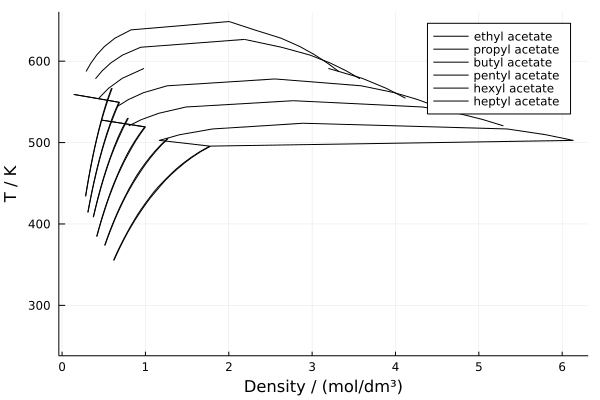

In [57]:
plt = plot( 1e-3 ./sat_EthAce[:,2],  T_EthAce,  color=:black, label = "ethyl acetate",xlabel="Density / (mol/dm³)",ylabel="T / K")
plt = plot!(1e-3 ./sat_EthAce[:,3],  T_EthAce,  color=:black, label = "")
plt = plot!(1e-3 ./sat_PropAce[:,2], T_PropAce, color=:black, label = "propyl acetate")
plt = plot!(1e-3 ./sat_PropAce[:,3], T_PropAce, color=:black, label = "")
plt = plot!(1e-3 ./sat_ButAce[:,2],  T_ButAce,  color=:black, label = "butyl acetate")
plt = plot!(1e-3 ./sat_ButAce[:,3],  T_ButAce,  color=:black, label = "")
plt = plot!(1e-3 ./sat_PentAce[:,2], T_PentAce, color=:black, label = "pentyl acetate")
plt = plot!(1e-3 ./sat_PentAce[:,3], T_PentAce, color=:black, label = "")
plt = plot!(1e-3 ./sat_HexAce[:,2],  T_HexAce,  color=:black, label = "hexyl acetate")
plt = plot!(1e-3 ./sat_HexAce[:,3],  T_HexAce,  color=:black, label = "")
plt = plot!(1e-3 ./sat_HeptAce[:,2], T_HeptAce, color=:black, label = "heptyl acetate")
plt = plot!(1e-3 ./sat_HeptAce[:,3], T_HeptAce, color=:black, label = "")
display(plt)

In [ ]:
plt = plot( T_EthAce,  P_sat_EthAce/1e6,  color=:black, label = "ethyl acetate",yaxis=:log,xlabel="T / K",ylabel="P / MPa",legend=:bottomright)
plt = plot!(T_PropAce, P_sat_PropAce/1e6, color=:black, label = "propyl acetate")
plt = plot!(T_ButAce,  P_sat_ButAce/1e6,  color=:black, label = "butyl acetate")
plt = plot!(T_PentAce, P_sat_PentAce/1e6, color=:black, label = "pentyl acetate")
plt = plot!(T_HexAce,  P_sat_HexAce/1e6,  color=:black, label = "hexyl acetate")
plt = plot!(T_HeptAce, P_sat_HeptAce/1e6, color=:black, label = "heptyl acetate")
display(plt)

## Figure 8

In [58]:
# Setting up the models
pentadecane       = SAFTgammaMie(["pentadecane"])
eicosane          = SAFTgammaMie(["eicosane"])
pentacosane       = SAFTgammaMie(["pentacosane"])
triacontane       = SAFTgammaMie(["triacontane"]);

In [59]:
# Get critical point for all species
(T_c_pentadecane, p_c_pentadecane, v_c_pentadecane)     = crit_pure(pentadecane)
(T_c_eicosane, p_c_eicosane, v_c_eicosane)              = crit_pure(eicosane)
(T_c_pentacosane, p_c_pentacosane, v_c_pentacosane)     = crit_pure(pentacosane)
(T_c_triacontane, p_c_triacontane, v_c_triacontane)     = crit_pure(triacontane);

In [60]:
T_c_triacontane

909.057173604869

In [ ]:
# Get saturation properties for all species
T_pentadecane   = range(350, T_c_pentadecane, length = 50)
T_eicosane      = range(350, T_c_eicosane,    length = 50)
T_pentacosane   = range(350, T_c_pentacosane, length = 50)
T_triacontane   = range(350, T_c_triacontane, length = 50)

A = sat_pure.(pentadecane,T_pentadecane)
B = sat_pure.(eicosane,T_eicosane)
C = sat_pure.(pentacosane,T_pentacosane)
D = sat_pure.(triacontane,T_triacontane)

In [ ]:
plt = plot( 1e-3 ./v_l_pentadecane,  T_pentadecane, color=:black, label = "pentadecane", xlabel="Density / (mol/dm³)",ylabel="T / K")
plt = plot!(1e-3 ./v_v_pentadecane,  T_pentadecane, color=:black, label = "")
plt = plot!(1e-3 ./v_l_eicosane,     T_eicosane,    color=:black, label = "eicosane")
plt = plot!(1e-3 ./v_v_eicosane,     T_eicosane,    color=:black, label = "")
plt = plot!(1e-3 ./v_l_pentacosane,  T_pentacosane, color=:black, label = "pentacosane")
plt = plot!(1e-3 ./v_v_pentacosane,  T_pentacosane, color=:black, label = "")
plt = plot!(1e-3 ./v_l_triacontane,  T_triacontane, color=:black, label = "triacontane")
plt = plot!(1e-3 ./v_v_triacontane,  T_triacontane, color=:black, label = "")
display(plt)

In [ ]:
plt = plot(T_pentadecane,P_sat_pentadecane/1e6,color=:black,yaxis=:log,xlabel="T / K",ylabel="P / MPa", label = "pentadecane",legend=:bottomright)
plt = plot!(T_eicosane,P_sat_eicosane/1e6,color=:black, label = "eicosane")
plt = plot!(T_pentacosane,P_sat_pentacosane/1e6,color=:black, label = "pentacosane")
plt = plot!(T_triacontane,P_sat_triacontane/1e6,color=:black, label = "triacontane")
display(plt)